# Play with agglomeration effects with m

Startup run in 8.785001039505005 secs.


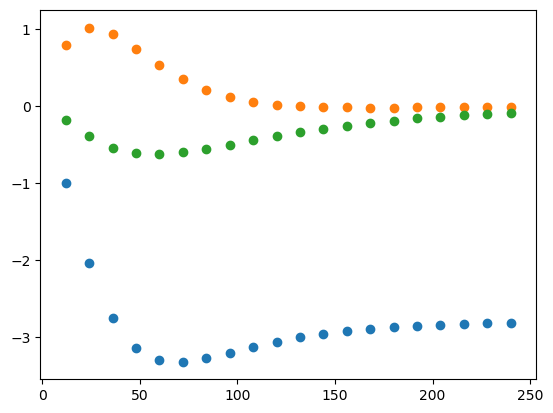

false

In [1]:
using NBInclude
_VERS_ = :base
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/check_with_m")
_tosave = false

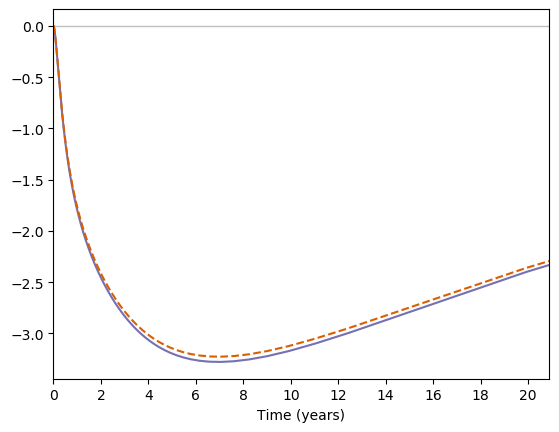

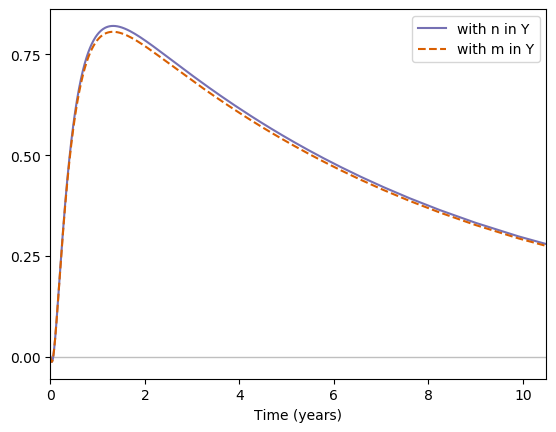

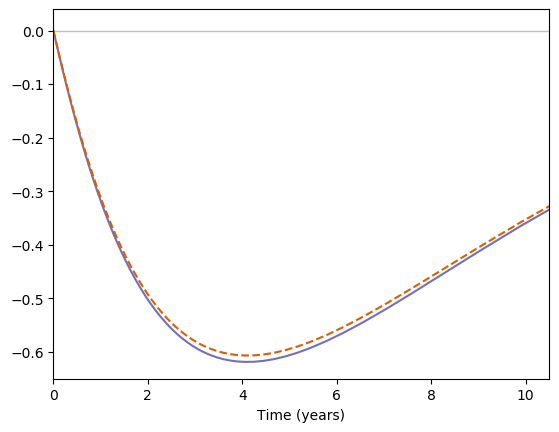

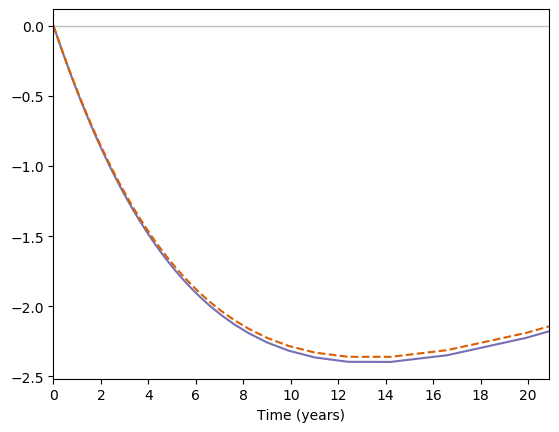

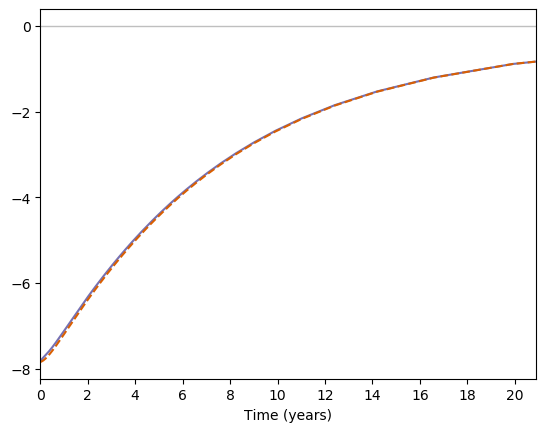

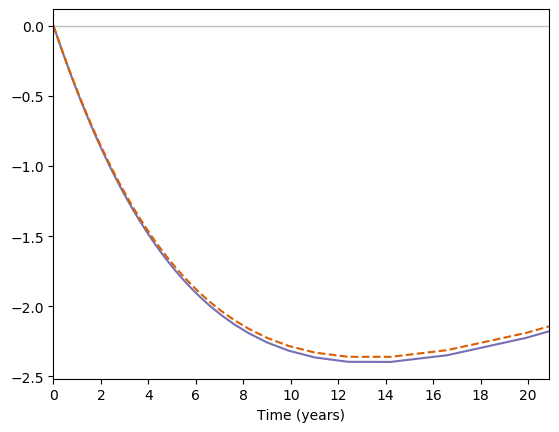

()

In [2]:
tab =[(p, simulate(240, simpar, p)), (p, simulate_m(240, simpar, p))]
mylabel = ["with n in Y", "with m in Y"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
#legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()


### population
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.d./myp.d_star .-1) .* 100  , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"population.png")) : ()



## productivity
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    if i ==1
        yy = [Atilde_fun(mysimu.t[i],myp) * Agglo.Y_fun(mysimu.d[i], mysimu.m[i]*p.n_star/p.m_star, myp) for i in 1:length(mysimu.l)]
    else
        yy = [Atilde_fun(mysimu.t[i],myp) * Agglo.Y_fun(mysimu.d[i], mysimu.n[i], myp) for i in 1:length(mysimu.l)]
    end
    plot(mysimu.t ./ 12, (yy ./ myp.Y_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"productivity.png")) : ()




## housing
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    yy = [Agglo.H_fun(mysimu.d[i], mysimu.n[i], myp) for i in 1:length(mysimu.l)]
    plot(mysimu.t ./ 12, (yy ./ myp.H_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"housing.png")) : ()